In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

## The intricacies of Seattle’s Airbnb scene

### Business understanding:

Using the airbnb dataset from Seattle on Kaggle, this analysis is looking for answers for the following questions:

 * How the review scores influence the booking frequency?
 * Is it beneficial to choose or become a “superhost”?
 * Should you manage your Airbnb apartment yourself, or is it more advantageous to use the services of a professional Airbnb apartment manager?
  

In [8]:
listings = pd.read_csv('listings.csv')
# reviews = pd.read_csv('reviews.csv')
# calendar = pd.read_csv('calendar.csv')

The dataset contains 3818 accommodations in Seattle with a lot of details about both the host and the residence itself. Most of the columns are not necessary or useful for  the analysis.

I made some conversions and added some new columns.

In [9]:
listings.host_response_rate=listings.host_response_rate.str.replace('%','').astype('float')
listings.price=listings.price.str.replace('[$,.]','').astype('float')/100
#calendar.price=calendar.price.str.replace('[$,.]','').astype('float')/100
listings.host_is_superhost=listings.host_is_superhost.map({'t':1,'f':0}).astype('bool')
listings['price_per_bed']=listings['price']/listings['beds']
listings['price_per_accommodates']=listings['price']/listings['accommodates']
df_hosts= pd.DataFrame(listings.groupby('host_id').id.count()>=3)
listings=listings.merge(df_hosts,on='host_id',how='left')
listings.rename(columns={'id_x':'id','id_y':'professional'}, inplace=True)

C:\Users\G\AppData\Local\Temp\ipykernel_18400\2926611614.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings.price=listings.price.str.replace('[$,.]','').astype('float')/100


In [64]:
def plot_hist(column_name, size=None, bin=None,x_label=None,y_label=None,title=None):
    '''
    This function generates a basic histogram with labels and title.
    The default size is 16,4. 
    The default bin is the ratio of the max and min value.
    Use None to skip a parameter input

    Input:
    column_name (series)
    Optional input:
    size (int,int)
    bin (int)
    x_label (string)
    y_label (string)
    title (string)

    Output:
    Bar chart of the histogram (count values)
    Png file with chart + title.png or chart.png if no title was defined

    Examples:
    plot_hist(listings.groupby('id')['price'].mean() ,(16,4),50,'Price (USD)','Number of listings','Number of listings by price')
    plot_hist(listings.groupby('id')['price'].mean() ,None,None,'Price (USD)','Number of listings','Number of listings by price')
    '''
    bin = int(column_name.max()/column_name.min()) if bin is None else bin
    size = (16,4) if size is None else size

    plt.figure(figsize=size)
    plt.hist(column_name, bins=bin)
    
    if y_label != None: plt.ylabel(y_label)
    if x_label != None:plt.xlabel(x_label)
    chart_name = 'chart.png'
    if title != None:
        plt.title(title)
        chart_name = 'chart_'+ title + '.png'
    
    plt.savefig(chart_name)
    plt.show()

We can see the dataset contains 3818 listings

In [10]:
listings.shape

(3818, 95)

<Axes: >

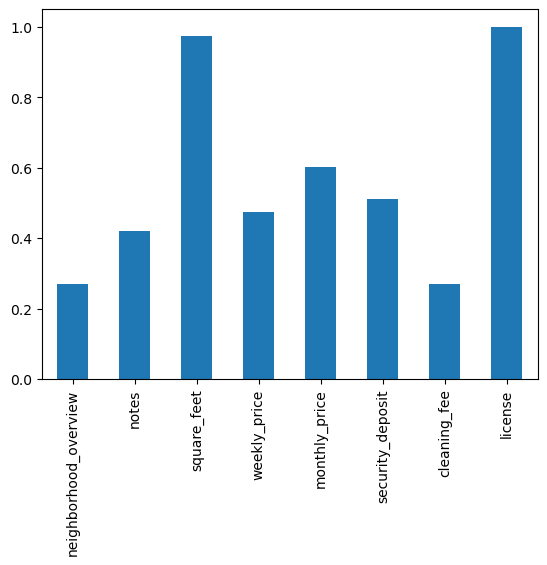

In [11]:
listings_missing = listings.isnull().mean()
listings_missing[listings_missing>0.25].plot.bar()
# columns with a significant amount of missing values

There are a few columns with significant amount of missing data, I decided not to use them.

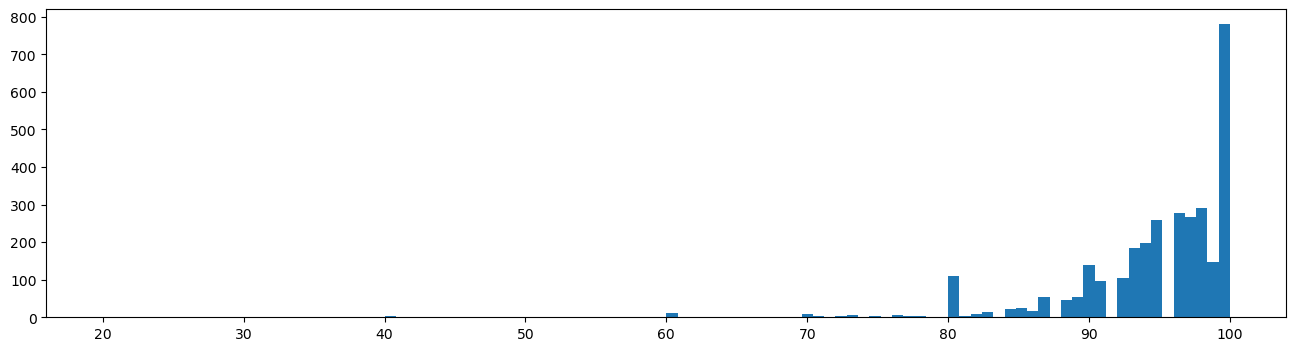

In [74]:
plot_hist(listings.review_scores_rating,None,100)

## General look at the data

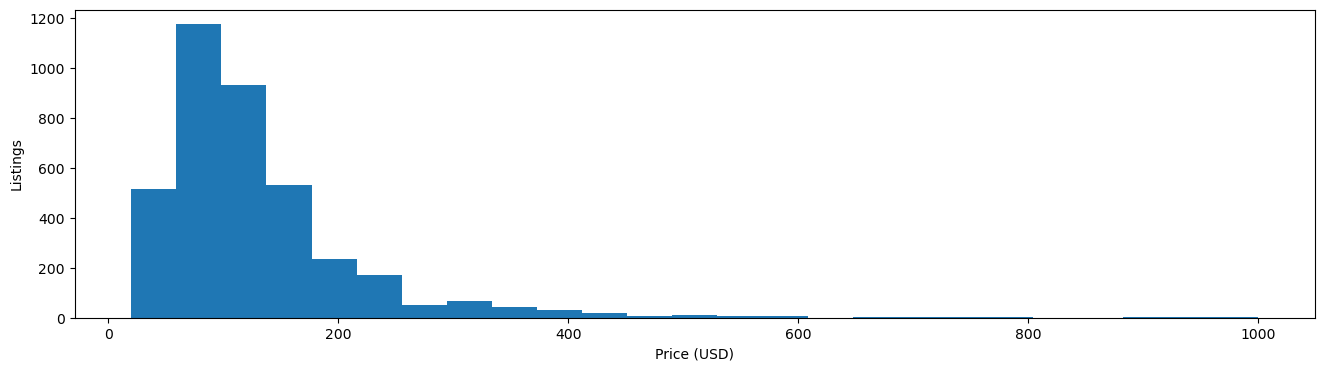

In [75]:
plot_hist(listings.groupby('id')['price'].mean(),None,25,'Price (USD)','Listings')

In [14]:
listings.groupby('host_id')['host_total_listings_count'].mean().sort_values(ascending=False)

host_id
30283594    502.0
31148752    354.0
4962900     169.0
661691      163.0
103427       84.0
            ...  
11376974      1.0
11358129      1.0
18423248      1.0
1075031       NaN
42515980      NaN
Name: host_total_listings_count, Length: 2751, dtype: float64

In [15]:
listings[listings['price']>=1000]['price']

3122    1000.0
Name: price, dtype: float64

In [16]:
#listings.groupby('id')['price_per_beds'].mean().describe()
listings.groupby('id')['price_per_accommodates'].mean().describe()

count    3818.000000
mean       41.266923
std        20.676221
min         4.750000
25%        27.500000
50%        37.500000
75%        50.000000
max       275.000000
Name: price_per_accommodates, dtype: float64

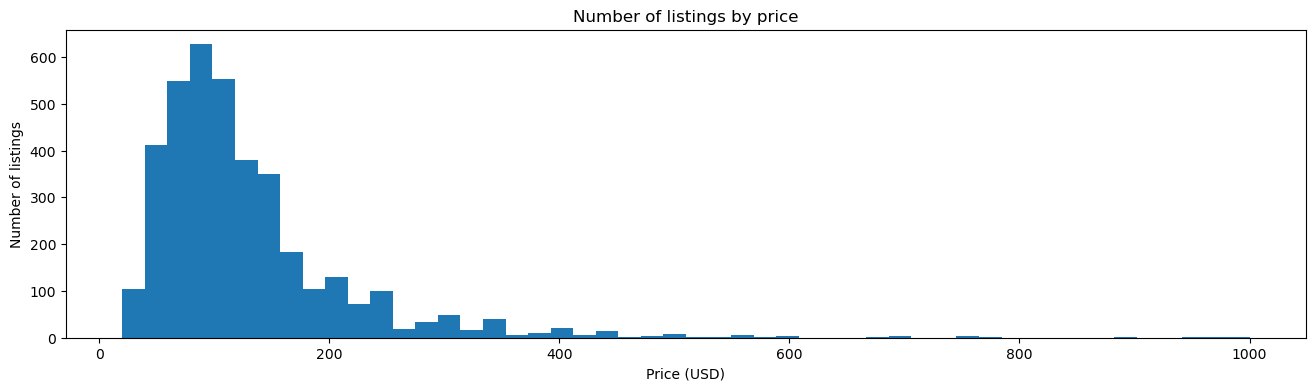

In [63]:
plot_hist(listings.groupby('id')['price'].mean() ,None,50,'Price (USD)','Number of listings','Number of listings by price')

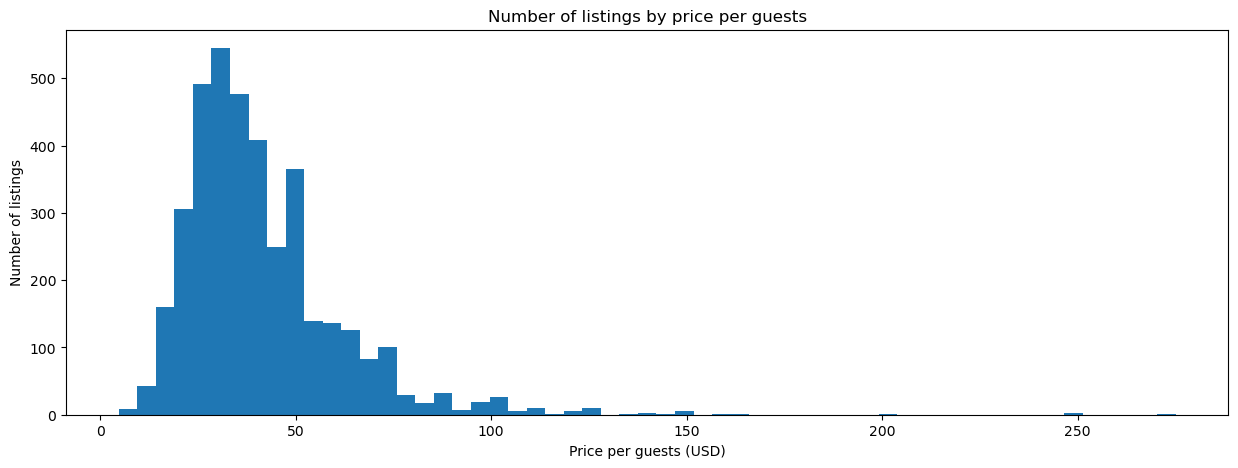

In [67]:
plot_hist(listings.groupby('id')['price_per_accommodates'].mean() ,(15,5),None,'Price per guests (USD)','Number of listings','Number of listings by price per guests')

In [19]:
listings.groupby('neighbourhood_group_cleansed')['price'].agg(['mean','count']).sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_group_cleansed,,
Magnolia,177.672131,61
Queen Anne,157.223729,295
Downtown,154.405660,530
West Seattle,141.359606,203
Cascade,140.101124,89
Capitol Hill,130.592593,567
Central Area,128.338753,369
Ballard,124.682609,230
Other neighborhoods,119.968514,794


<Figure size 1000x500 with 0 Axes>

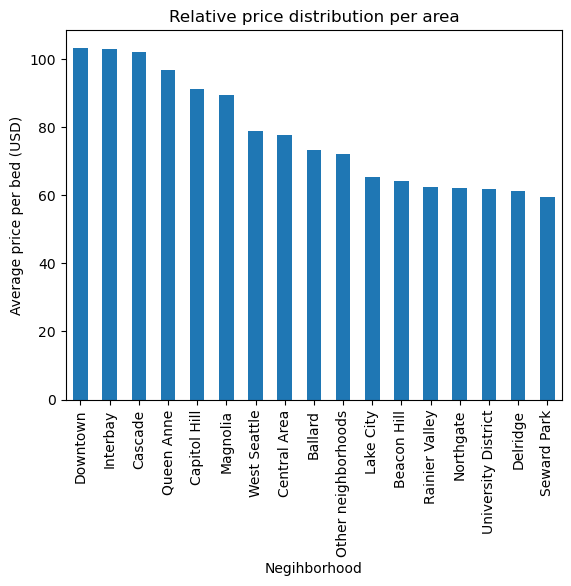

In [20]:
plt.figure(figsize=(10,5))
listings.groupby('neighbourhood_group_cleansed')['price_per_bed'].agg(['mean']).sort_values(by='mean',ascending=False).plot(kind='bar', legend=None)
plt.ylabel('Average price per bed (USD)')
plt.xlabel('Negihborhood')
plt.title('Relative price distribution per area')
plt.savefig('chart_2_price_bed.png')
plt.show;


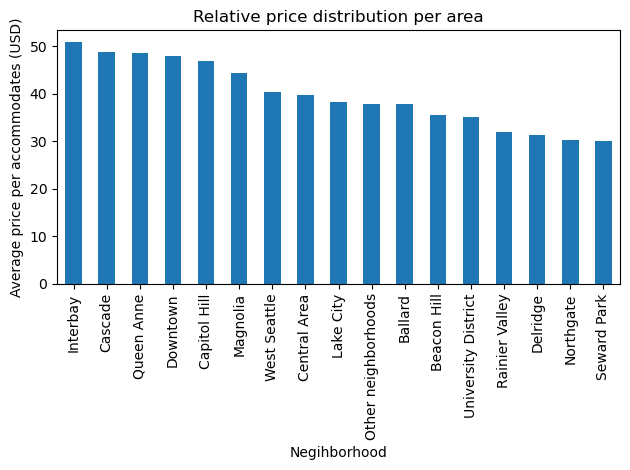

In [21]:
#plt.figure(figsize=(16,5))
listings.groupby('neighbourhood_group_cleansed')['price_per_accommodates'].agg(['mean']).sort_values(by='mean',ascending=False).plot(kind='bar', legend=None)
plt.ylabel('Average price per accommodates (USD)')
plt.xlabel('Negihborhood')
plt.title('Relative price distribution per area')
plt.tight_layout()
plt.savefig('chart_3_price_accommodates.png')
plt.show;


In [22]:
listings.groupby('neighbourhood_group_cleansed')['price_per_bed'].agg(['mean','count']).sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_group_cleansed,,
Downtown,103.301539,530
Interbay,102.909091,11
Cascade,102.086142,89
Queen Anne,96.848878,295
Capitol Hill,91.282321,567
Magnolia,89.441335,61
West Seattle,78.830167,203
Central Area,77.767397,369
Ballard,73.265704,230


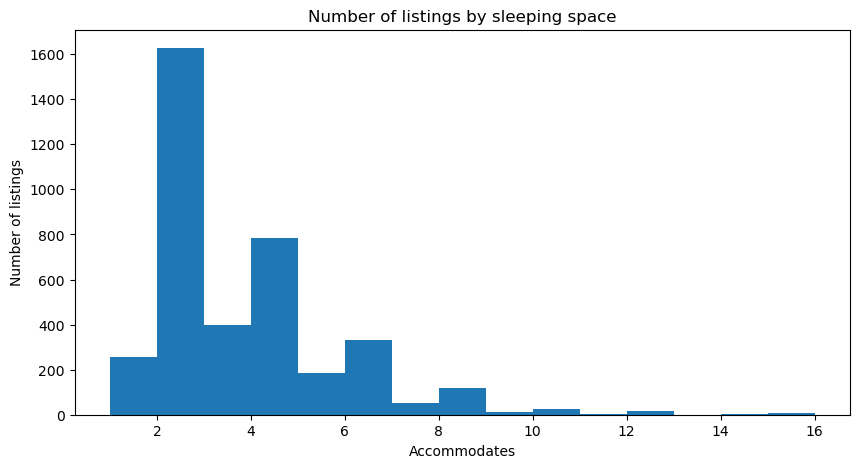

In [79]:
plot_hist(listings.accommodates,(10,5),15,'Accommodates','Number of listings',
          'Number of listings by sleeping space')

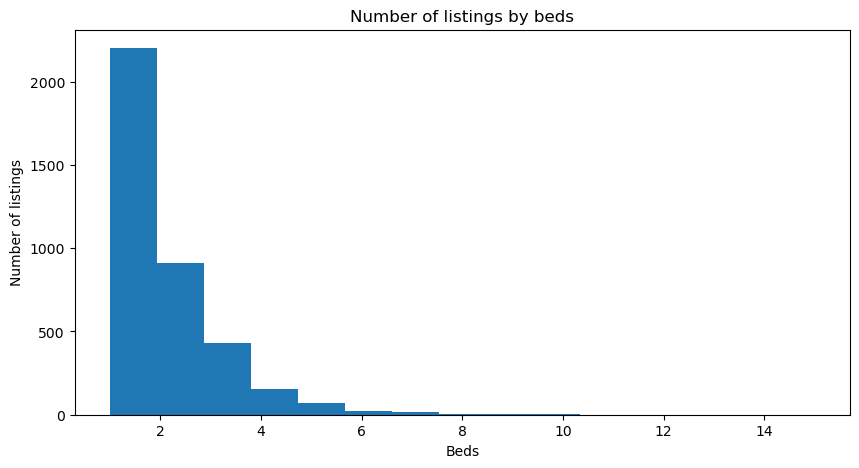

In [78]:
plot_hist(listings.beds,(10,5),15,'Beds','Number of listings',
          'Number of listings by beds')

## How the review scores influence the booking frequency?

In [25]:
listings['review_scores_rating'].describe()

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

The reviews are overwhelmingly positive, most of them are above 96%, I don't think it is reasonable to expect a significant preference from the guests towards such a small variance, like choosing a host based on reviews when they are 96% or 98% rated.
Altho I would expect less bookings for the badly rated hosts, for example below 90%

<Figure size 1000x500 with 0 Axes>

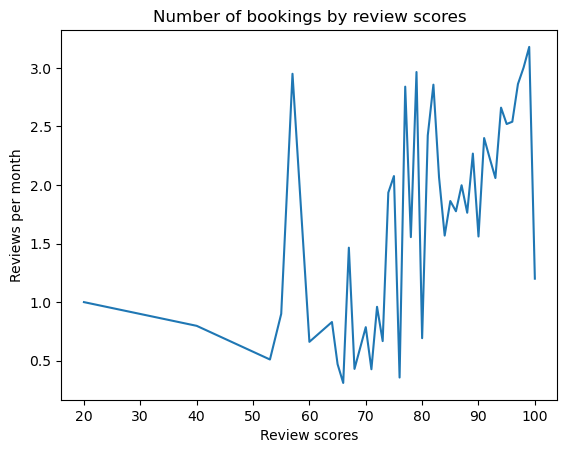

In [26]:
plt.figure(figsize=(10,5))
listings.groupby('review_scores_rating').agg({'reviews_per_month':['mean']}).plot(legend=None)
plt.ylabel('Reviews per month')
plt.xlabel('Review scores')
plt.title('Number of bookings by review scores')
plt.savefig('chart_4_bookings_per_review.png')
plt.show;

For the sake of the analysis, I considered the "reviews_per_month" column a proxy for bookings.

The chart shows some positive correlation between bookings and reviews, but the relationship is not clearly defined possibly because of low number of lower rated hosts.

## Is it beneficial to choose or become a "superhost"?

In [27]:
listings.groupby('host_is_superhost').agg({'reviews_per_month':['mean'],'price':'mean','review_scores_rating':'mean'})

,reviews_per_month,price,review_scores_rating
,mean,mean,mean
host_is_superhost,,,
False,1.804770,127.391376,93.652893
True,2.969627,130.253846,97.395473


The stats show that superhosts receive more bookings and have higher review ratings but also charge a slightly higher price.

## Should you manage your Airbnb apartment personally, or is it more advantageous to enlist the services of a 'professional' Airbnb apartment manager?

I defined a "professional" host someone who has more than 3 independent residences listen on the platform.

In [28]:
listings.groupby('professional').agg({'reviews_per_month':['mean'],'price':'mean','review_scores_rating':'mean','accommodates':'mean'})

,reviews_per_month,price,review_scores_rating,accommodates
,mean,mean,mean,mean
professional,,,,
False,2.119198,126.718652,94.973373,3.230636
True,1.960124,131.831736,93.263354,3.713525


The data show a bad picture of the "professional" hosts with lower monthly reviews, higher prices and lower review ratings, however their apartments tend to host a higher number of people on average.

<Figure size 1000x1000 with 0 Axes>

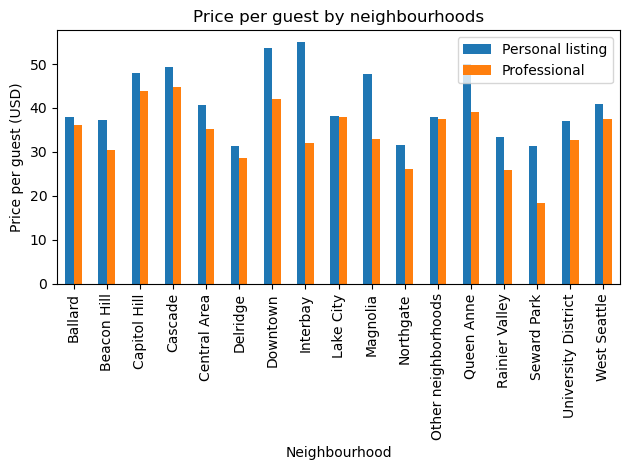

In [29]:
plt.figure(figsize=(10,10))
listings.groupby(['neighbourhood_group_cleansed','professional']).agg({'price_per_accommodates':'mean'}).unstack().plot(kind='bar')
plt.ylabel('Price per guest (USD)')
plt.xlabel('Neighbourhood')
plt.title('Price per guest by neighbourhoods')
plt.legend(['Personal listing','Professional'], loc=1)
plt.tight_layout()
plt.savefig('chart_5_price_per_area_professional.png')
plt.show;

Looking at the breakdown per neighbourhood based on the cost per person for the Airbnb, we can see that the costs are lower at  the residences hosted by "professional" hosts, indicating a more efficient layout or simply just bigger accommodations.

### Results:

  Overall, the data showed us among the many excellent Airbnb hosts in Seattle, the Superhosts stood out, providing even higher quality service, while the “professional” hosts although offering cost effective residences, manage lower amount of reservations and a bit lower quality service.